In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

df1 = pd.read_csv('datasets/control/dataset_2024-05-06_21-00_50x_48C_6-conc.csv')
df1['group'] = 'control'
df1['source'] = 'Computer 1'

df2 = pd.read_csv('datasets/control/dataset_2024-05-07_21-00_50x_44C_6-conc.csv')
df2['group'] = 'control'
df2['source'] = 'Computer 2'

df3 = pd.read_csv('datasets/experimental/dataset_2024-05-10_21-00_50x_48C_6-conc.csv')
df3['group'] = 'experimental'
df3['source'] = 'Computer 1'

df4 = pd.read_csv('datasets/experimental/dataset_2024-05-11_21-00_50x_44C_6-conc.csv')
df4['group'] = 'experimental'
df4['source'] = 'Computer 2'

df = pd.concat([df1, df2, df3, df4])
df.reset_index(drop=True, inplace=True)

for column in df.filter(like='_avg_watts_consumption').columns:
    prefix = column.split('_avg_watts_consumption')[0]

    duration = df[f'pipeline_duration']
    watts = df[column]


    duration = duration if prefix == 'cicd_server' else duration+5
    df[f'{prefix}_joules_consumption'] = watts * duration

df

,project_id,pipeline_id,pipeline_start,pipeline_finish,pipeline_duration,cicd_server_avg_watts_consumption,monitoring_pc_avg_watts_consumption,group,source,cicd_server_joules_consumption,monitoring_pc_joules_consumption
0,21,1574,1715022013,1715022405,392,49.055005,14.338251,control,Computer 1,19229.561769,5692.285525
1,21,1575,1715023039,1715023425,386,48.650311,14.549810,control,Computer 1,18779.020214,5688.975580
2,21,1576,1715024065,1715024439,374,50.721065,14.443502,control,Computer 1,18969.678138,5474.087069
3,21,1577,1715025091,1715025466,375,49.381282,14.403639,control,Computer 1,18517.980789,5473.382790
4,21,1578,1715026117,1715026490,373,49.203947,14.515968,control,Computer 1,18353.072283,5487.035775
...,...,...,...,...,...,...,...,...,...,...,...
195,8,2584,1715478638,1715479167,529,69.450897,14.657817,experimental,Computer 2,36739.524383,7827.274407
196,8,2585,1715479184,1715479709,525,69.953939,14.598336,experimental,Computer 2,36725.818005,7737.118310
197,8,2586,1715479732,1715480260,528,69.338314,14.472911,experimental,Computer 2,36610.629944,7714.061483
198,8,2587,1715480279,1715480812,533,69.099275,14.387245,experimental,Computer 2,36829.913806,7740.337720


Split dataset into 2 pcs

In [2]:
pc1 = df[df['source'] == 'Computer 1']
pc2 = df[df['source'] == 'Computer 2']

Std and mean of monitoring pc power consumption

In [3]:
print("Std", df['monitoring_pc_avg_watts_consumption'].std())
print("Mean", df['monitoring_pc_avg_watts_consumption'].mean())

Std 0.21270306936684247
Mean 14.577584953775018


In [4]:
print("Std", pc1['monitoring_pc_avg_watts_consumption'].std())
print("Mean", pc1['monitoring_pc_avg_watts_consumption'].mean())
print()
print("Std", pc2['monitoring_pc_avg_watts_consumption'].std())
print("Mean", pc2['monitoring_pc_avg_watts_consumption'].mean())

Std 0.18752716993934987
Mean 14.554063594053144

Std 0.2337906377613971
Mean 14.601106313496892


Data PC1

In [5]:
print("Control; CI/CD; Std", pc1[pc1['group'] == 'control']['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std", pc1[pc1['group'] == 'control']['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Mean", pc1[pc1['group'] == 'control']['cicd_server_joules_consumption'].mean())
print("Control; Monitoring; Mean", pc1[pc1['group'] == 'control']['monitoring_pc_joules_consumption'].mean())
print()
print("Experimental; CI/CD; Std", pc1[pc1['group'] == 'experimental']['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std", pc1[pc1['group'] == 'experimental']['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Mean", pc1[pc1['group'] == 'experimental']['cicd_server_joules_consumption'].mean())
print("Experimental; Monitoring; Mean", pc1[pc1['group'] == 'experimental']['monitoring_pc_joules_consumption'].mean())

Control; CI/CD; Std 241.72322132168918
Control; Monitoring; Std 86.66040543709974

Control; CI/CD; Mean 18710.87954513167
Control; Monitoring; Mean 5499.8990557718125

Experimental; CI/CD; Std 238.61573524509143
Experimental; Monitoring; Std 107.25220961872968

Experimental; CI/CD; Mean 18515.81045664633
Experimental; Monitoring; Mean 5517.247701173216


Data PC2

In [6]:
print("Control; CI/CD; Std", pc2[pc2['group'] == 'control']['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std", pc2[pc2['group'] == 'control']['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Mean", pc2[pc2['group'] == 'control']['cicd_server_joules_consumption'].mean())
print("Control; Monitoring; Mean", pc2[pc2['group'] == 'control']['monitoring_pc_joules_consumption'].mean())
print()
print("Experimental; CI/CD; Std", pc2[pc2['group'] == 'experimental']['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std", pc2[pc2['group'] == 'experimental']['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Mean", pc2[pc2['group'] == 'experimental']['cicd_server_joules_consumption'].mean())
print("Experimental; Monitoring; Mean", pc2[pc2['group'] == 'experimental']['monitoring_pc_joules_consumption'].mean())

Control; CI/CD; Std 338.80367341199366
Control; Monitoring; Std 105.18792614846747

Control; CI/CD; Mean 36952.88867110758
Control; Monitoring; Mean 7804.972458151273

Experimental; CI/CD; Std 277.79131376037844
Experimental; Monitoring; Std 150.98374710284045

Experimental; CI/CD; Mean 36586.58015691856
Experimental; Monitoring; Mean 7830.003198737514


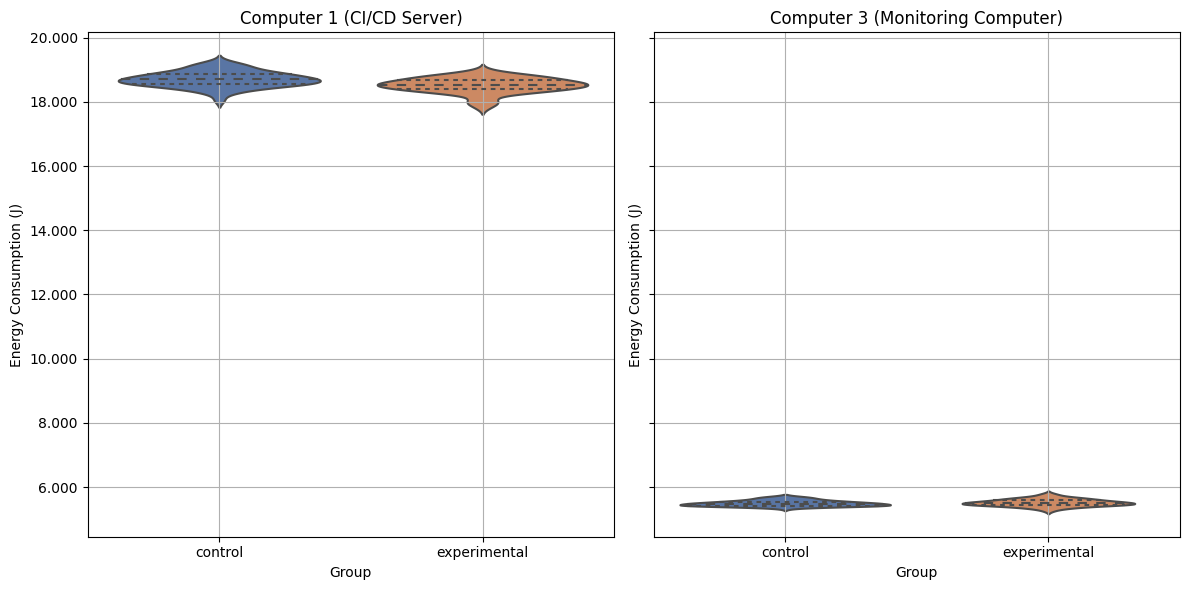

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Computer 1
sns.violinplot(x='group', y='cicd_server_joules_consumption', data=pc1,
               ax=axes[0], inner='quart', linewidth=1.5, palette='deep')
axes[0].set_title('Computer 1 (CI/CD Server)')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Energy Consumption (J)')
axes[0].grid(True)

sns.violinplot(x='group', y='monitoring_pc_joules_consumption', data=pc1,
               ax=axes[1], inner='quart', linewidth=1.5, palette='deep')
axes[1].set_title('Computer 3 (Monitoring Computer)')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Energy Consumption (J)')

axes[1].set_ylim(axes[0].get_ylim())
axes[1].grid(True)

axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',','*').replace('.', ',').replace('*','.')))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'.replace(',','*').replace('.', ',').replace('*','.')))

plt.tight_layout()
plt.show()

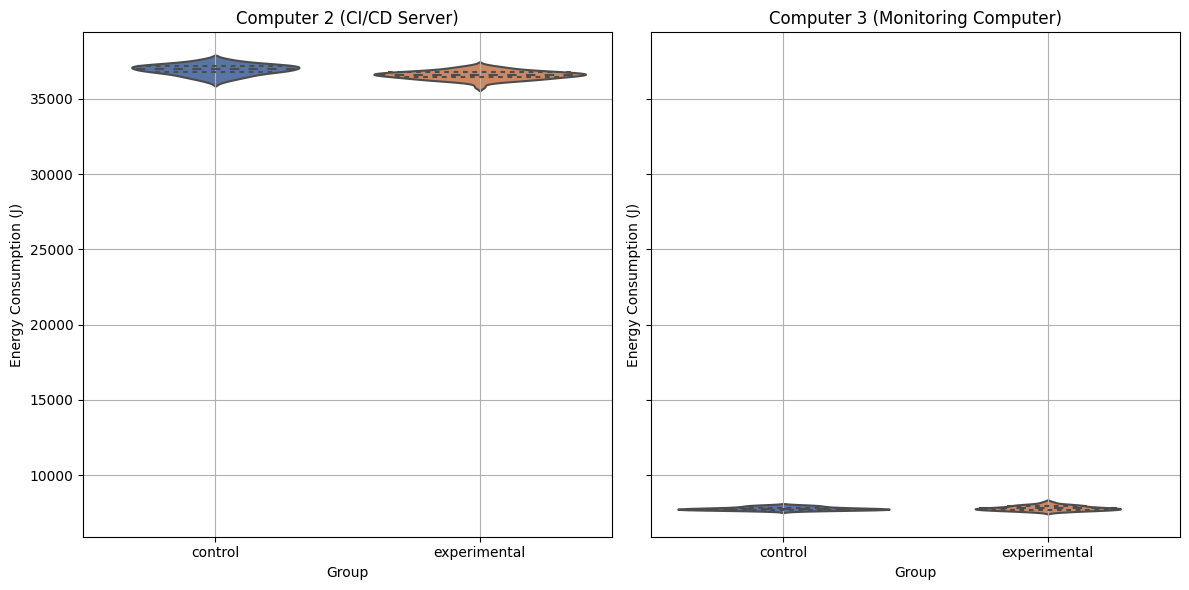

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Computer 2
sns.violinplot(x='group', y='cicd_server_joules_consumption', data=pc2,
               ax=axes[0], inner='quart', linewidth=1.5, palette='deep')
axes[0].set_title('Computer 2 (CI/CD Server)')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Energy Consumption (J)')
axes[0].grid(True)

sns.violinplot(x='group', y='monitoring_pc_joules_consumption', data=pc2,
               ax=axes[1], inner='quart', linewidth=1.5, palette='deep')
axes[1].set_title('Computer 3 (Monitoring Computer)')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Energy Consumption (J)')

axes[1].set_ylim(axes[0].get_ylim())
axes[1].grid(True)

plt.tight_layout()
plt.show()